In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
dipole_file = '../../data/molecular_dipoles.dat'
traj_file = '../../data/dft_traj-0.xyz'

In [3]:
import sys

In [8]:
sys.path.append('../../python')

In [11]:
from utils import *

In [16]:
with open(traj_file) as f:
    xyz = read_xyz(f)[0]

In [17]:
dipoles = read_molecular_dipoles(dipole_file, 1)

In [18]:
xyz.shape

(384, 3)

In [19]:
dipoles.shape

(128, 3, 1)

(array([ 6., 14., 22., 27., 14., 23., 13.,  7.,  1.,  1.]),
 array([2.35321665, 2.47266968, 2.59212272, 2.71157575, 2.83102879,
        2.95048182, 3.06993486, 3.18938789, 3.30884092, 3.42829396,
        3.54774699]),
 <a list of 10 Patch objects>)

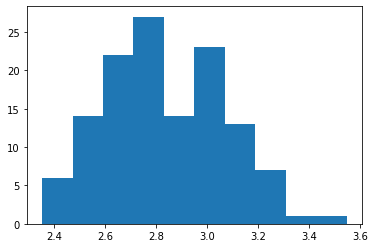

In [25]:
plt.hist(np.linalg.norm(dipoles, axis=1))

In [40]:
dipoles = dipoles[:,:,0]
dipoles.shape

(128, 3)

In [41]:
def dipole_hist(i, dipoles):
    start_idx = i * 3 # also the coordinates of the oxygen
    masses = masses = (15.999, 1.00784, 1.00784)
    r = com(masses, xyz[start_idx:(start_idx + 3)])

    # translate so center of mass of relevant molecule is at origin
    rot_xyz = xyz - r
    
    # principle axis goes through oxygen and COM
    # rotate system first so that principle axis aligns with z-axis of box
    R1 = np.zeros((3,3))
    R_2vect(R1, rot_xyz[start_idx], (0, 0, 1))
    rot_xyz = np.matmul(R1, rot_xyz.T).T

    # secondary axis goes through hydrogens
    # rotate projection around z-axis so O-H vectors are in xz plane
    # angle in x-y plane
    H_idx = start_idx + 1
    theta = atan(rot_xyz[H_idx,1] / rot_xyz[H_idx,0])
    # rotate about z-axis 
    R2 = R.from_euler('z', -theta)

    # get dipole for molecule i and frame, then rotate
    dipoles = np.matmul(R1, dipoles.T).T
    dipoles = R2.apply(dipoles)

    plt.hist(np.linalg.norm(dipoles, axis=1))

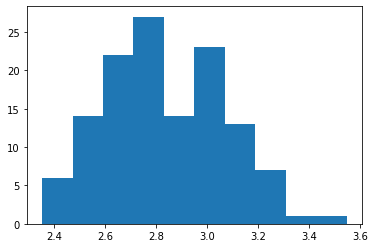

In [43]:
dipole_hist(2, dipoles)

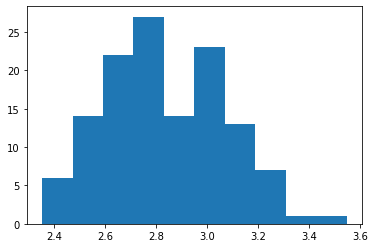

In [44]:
dipole_hist(3,dipoles)